# [9660] K-Nearest Neighbor 2
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/breast_cancer_diagnosis.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/07/24 12:17:49


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load data

In [3]:
# Lad data file (breast_cancer_diagnosis.csv) into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/breast_cancer_diagnosis.csv')
df.shape

(569, 13)

In [4]:
df.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


### Prepare data

In [5]:
# Check for missing values
df.isnull().sum()

,0
id,0
name,0
radius,71
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
concavity,0
symmetry,0


#### Improved technique for replacing missing values
Replace missing values with the column averages for each class

In [6]:
df['radius'].mean()

14.32663453815261

In [7]:
df.groupby("diagnosis")["radius"].mean()

,radius
diagnosis,
0,12.340825
1,17.896629


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


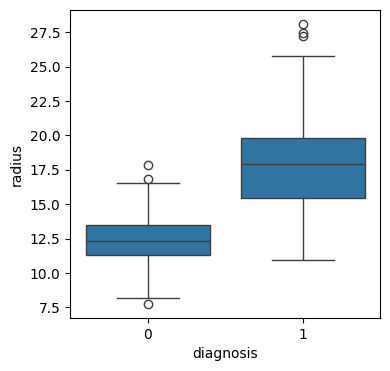

In [8]:
# Display average values for radius by diagnosis
plt.figure(figsize = (4,4))
sns.boxplot(x = "diagnosis", y = "radius", data = df)
plt.show()

In [9]:
# Calculate the mean radius for each diagnosis
mean_radius_by_diagnosis = df.groupby("diagnosis")["radius"].mean()

In [10]:
# Replace missing values in the "radius" column using the mean radius for each
#  diagnosis
for index, row in df.iterrows():
    if pd.isna(row["radius"]):
        df.loc[index, "radius"] = mean_radius_by_diagnosis[row["diagnosis"]]

In [11]:
df.sample(25)

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
545,ID922576,Louise Flaubert,13.620000,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.1664,0.05801,52,0
247,ID884626,Kynthia Moretta,12.890000,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.1596,0.06409,45,0
23,ID851509,Alta Blaker,21.160000,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.1769,0.05278,18,1
230,ID881972,Maddy Hume,17.050000,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.2131,0.06325,21,1
210,ID881046502,Lari Cammelli,20.580000,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.1765,0.05024,20,1
32,ID85382601,Prissie Mencken,17.020000,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.2248,0.06382,17,1
515,ID916221,Cissy Wentworth,11.340000,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.1927,0.06211,58,0
132,ID86730502,Valerye Distel,16.160000,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.2160,0.05891,29,1
457,ID9112367,Andriana Strassoldo,13.210000,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.1619,0.05584,43,0
510,ID91550,Conchita Dambry,11.740000,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.1499,0.06758,56,0


In [12]:
# Recheck for missing values
df.isnull().sum()

,0
id,0
name,0
radius,0
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
concavity,0
symmetry,0


In [13]:
# Drop non-numeric variables
df.drop(["id", "name"], axis=1, inplace=True)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.896629,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.896629,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


### Separate independent and dependent variables

In [14]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

### Standardize independent variables

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.01678700e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.21751501e+00,  2.25574689e+00, -3.28667534e-01],
       [ 1.79659251e+00, -3.53632408e-01,  1.68595471e+00, ...,
         1.39236330e-03, -8.68652457e-01, -9.17217738e-01],
       [ 1.53990202e+00,  4.56186952e-01,  1.56650313e+00, ...,
         9.39684817e-01, -3.98007910e-01, -6.22942636e-01],
       ...,
       [ 6.38568380e-01,  2.04557380e+00,  6.72675785e-01, ...,
        -8.09117071e-01, -8.95586935e-01, -1.35863039e+00],
       [ 1.80534332e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.13719425e+00,  1.04369542e+00,  1.12745118e-01],
       [-1.94000424e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -8.20069901e-01, -5.61032377e-01, -1.81529984e-01]])

### Split data into training and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,
                                                    test_size=0.25, random_state=42)

### Train model

In [17]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
knn = KNeighborsClassifier(weights='distance', metric='cosine')
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', weights='distance')

### Calculate accuracy score

In [20]:
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 4)}%")

Accuracy = 94.4056%


### Find best k value

In [21]:
# Set up array of possible k values
possible_k = np.arange(3,30,2)
possible_k

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [22]:
# Calculate accuracy for each k value
ac_scores=[]
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', metric='cosine')
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores=round((accuracy_score(y_test, y_pred) * 100), 4)
    ac_scores.append(scores)
print ("Accuracy Scores :", ac_scores)

Accuracy Scores : [93.7063, 94.4056, 93.7063, 93.7063, 93.7063, 93.7063, 93.7063, 93.7063, 94.4056, 95.1049, 95.1049, 95.1049, 95.1049, 95.1049]


In [23]:
max_index = ac_scores.index(max(ac_scores))
best_k = possible_k[max_index]
print ("Best value of k is", best_k)

Best value of k is 21


### Plot Accuracy vs Number of Neighbors (k)

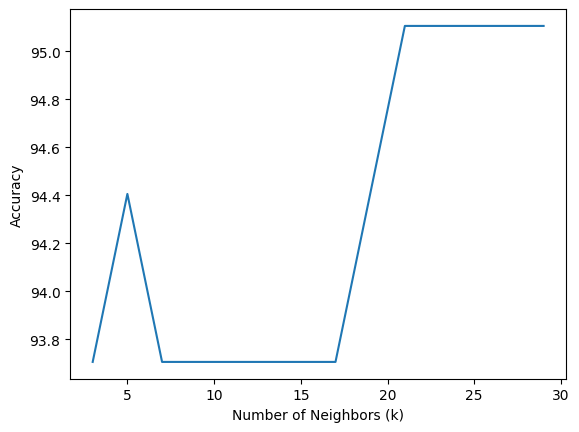

In [24]:
plt.plot(possible_k, ac_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()